In [1]:
import numpy as np
from msmbuilder.feature_selection import VarianceThreshold
from msmbuilder.decomposition import tICA
from msmbuilder.cluster import MiniBatchKMeans
from msmbuilder.msm import MarkovStateModel
from sklearn.pipeline import Pipeline
from glob import glob

/home/robert/anaconda3/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/robert/anaconda3/lib/python3.5/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
# variance_cut
# 		 threshold 	 0.0
# tica
# 		 commute_mapping 	 False
# 		 kinetic_mapping 	 True
# 		 lag_time 	 1
# 		 n_components 	 4
# 		 shrinkage 	 None
# cluster
# 		 batch_size 	 100
# 		 compute_labels 	 True
# 		 init 	 k-means++
# 		 init_size 	 None
# 		 max_iter 	 100
# 		 max_no_improvement 	 10
# 		 n_clusters 	 566
# 		 n_init 	 3
# 		 random_state 	 None
# 		 reassignment_ratio 	 0.01
# 		 tol 	 0.0
# 		 verbose 	 0
# msm
# 		 ergodic_cutoff 	 on
# 		 lag_time 	 50
# 		 n_timescales 	 2
# 		 prior_counts 	 0
# 		 reversible_type 	 mle
# 		 sliding_window 	 True
# 		 use_gap 	 None
# 		 verbose 	 True

In [4]:
traj_paths = glob('/home/robert/Datasets/DHFR/train/alpha/trajectory-*.npy')

len(traj_paths)

100

In [5]:
trajs = [np.load(x) for x in traj_paths]

In [17]:
tica=tICA(kinetic_mapping=True, lag_time=1, n_components=4)
cluster = MiniBatchKMeans(n_clusters=566)
ttrajs = tica.fit_transform(trajs)
ctrajs = cluster.fit_transform(ttrajs)
# ctrajs = pipe.fit_transform(trajs)

/home/robert/anaconda3/lib/python3.5/site-packages/sklearn/cluster/k_means_.py:1381: RuntimeWarning: init_size=300 should be larger than k=566. Setting it to 3*k
  init_size=init_size)


In [7]:
lags = np.arange(10,80,10)
n_timescales = 10
timescales = np.zeros((lags.shape[0], n_timescales))
models = []

for i,lag in enumerate(lags):
    msm = MarkovStateModel(lag_time=lag, n_timescales=n_timescales)
    msm.fit_transform(ctrajs)
    timescales[i] = msm.timescales_
    models.append(msm)

MSM contains 16 strongly connected components above weight=0.10. Component 3 selected, with population 37.000000%
MSM contains 16 strongly connected components above weight=0.05. Component 3 selected, with population 37.000000%
MSM contains 16 strongly connected components above weight=0.03. Component 3 selected, with population 37.000000%
MSM contains 16 strongly connected components above weight=0.03. Component 3 selected, with population 37.000000%
MSM contains 16 strongly connected components above weight=0.02. Component 3 selected, with population 37.000000%
MSM contains 16 strongly connected components above weight=0.02. Component 3 selected, with population 37.000000%
MSM contains 16 strongly connected components above weight=0.01. Component 3 selected, with population 37.000000%


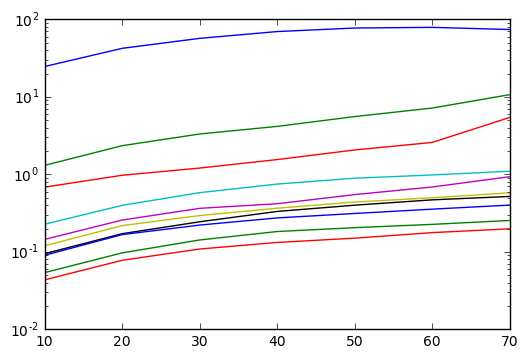

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
for i in range(timescales.shape[1]):
    plt.plot(lags, timescales.T[i]/1000)
    plt.yscale('log')

In [9]:
mm = models[4]

In [10]:
mm.n_states_

165

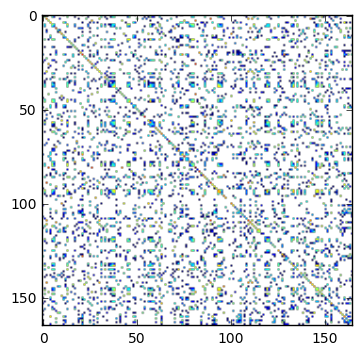

In [14]:
plt.imshow(np.log(mm.countsmat_))

In [18]:
txx = np.concatenate(ttrajs)

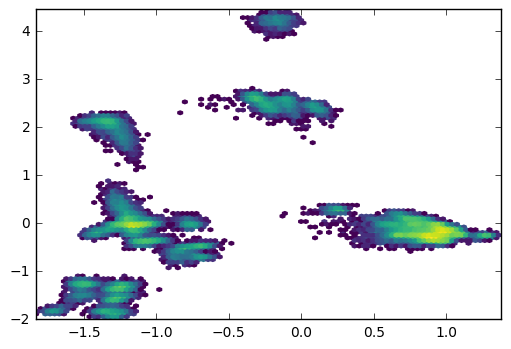

In [23]:
plt.hexbin(txx[:,0], txx[:,1], bins='log', mincnt=1, cmap='viridis')
# plt.scatter(cluster.cluster_centers_[:,0],
#             cluster.cluster_centers_[:,1], 
#             s=50, c='w', alpha=0.5)

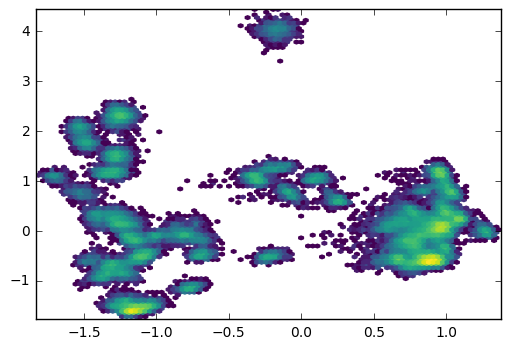

In [24]:
plt.hexbin(txx[:,0], txx[:,2], bins='log', mincnt=1, cmap='viridis')
# plt.scatter(cluster.cluster_centers_[:,0],
#             cluster.cluster_centers_[:,1], 
#             s=50, c='w', alpha=0.5)

<Container object of 165 artists>

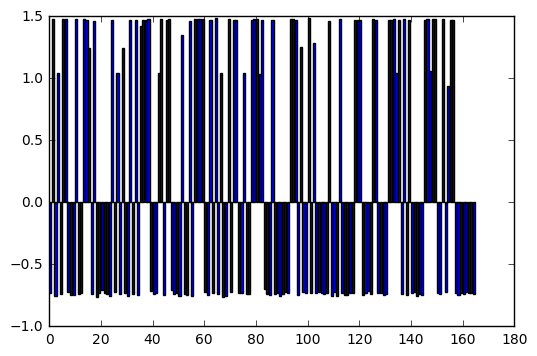

In [39]:
plt.bar(np.arange(mm.n_states_), mm.right_eigenvectors_[:,1])